In [3]:
import cv2 as cv
import os
import pandas as pd
import numpy as np

# Load Data

In [2]:
dataset=[]
folder_paths = ["C:\\Users\\lenovo\\Downloads\\archive (3)\\Male and Female face dataset\\Male Faces",
                "C:\\Users\\lenovo\\Downloads\\archive (3)\\Male and Female face dataset\\Female Faces"]

for i in folder_paths:
  folder_name=os.path.basename(i)
  for file_name in os.listdir(i):
    img_path=os.path.join(i,file_name)
    if os.path.isfile(img_path):
      img=cv.imread(img_path, cv.IMREAD_GRAYSCALE)
      if img is not None:
        resize_img=cv.resize(img,(150,150))
        flattened_img=resize_img.flatten().tolist()
        dataset.append(flattened_img+[folder_name])



In [4]:
df = pd.DataFrame(dataset)

# Data Visualization

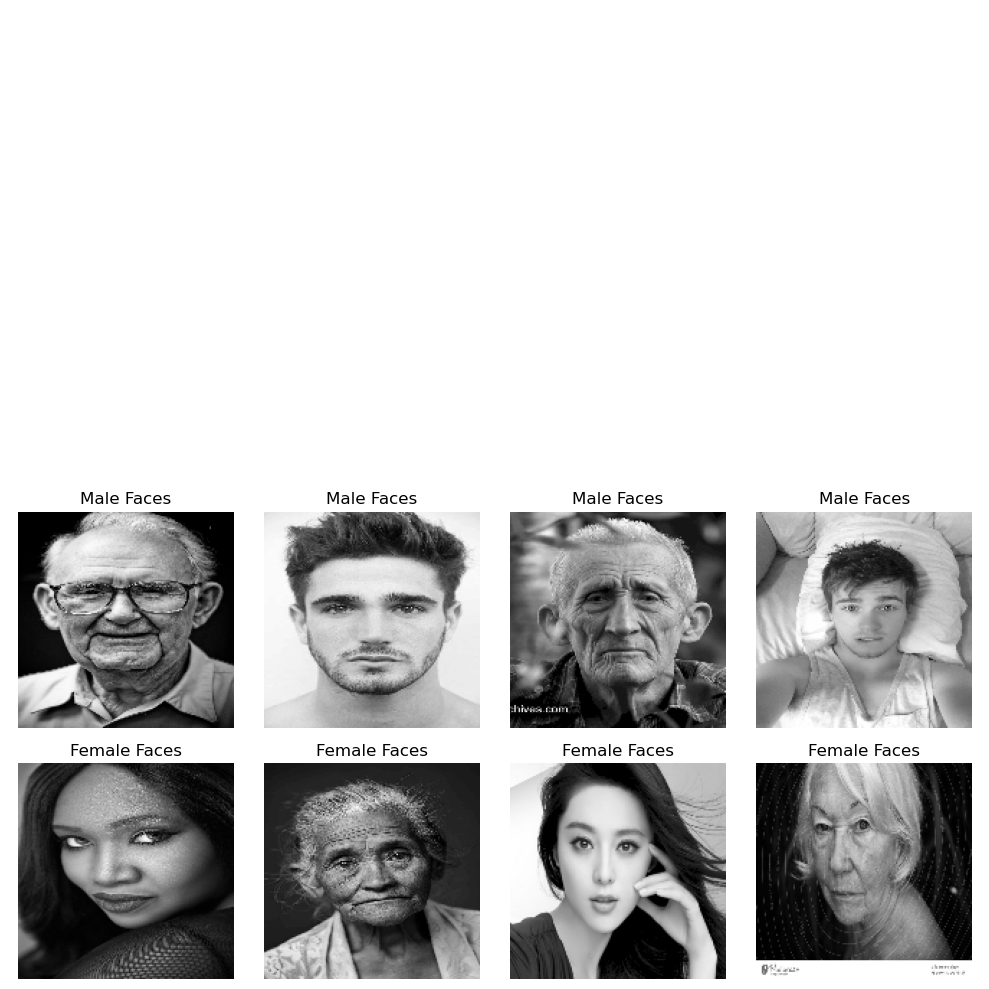

In [6]:


import matplotlib.pyplot as plt

# Your dataset and organization code...

num_samples_to_visualize = 4

# Dictionary to store images for each category
category_images = {"male": [], "female": []}

# Organize images by category
for data in dataset:
    img_data = data[:-1]
    label = data[-1]
    category_images.setdefault(label, []).append(img_data)  # Use setdefault here

# Plot sample images
plt.figure(figsize=(10, 10))
for label, images in category_images.items():
    for i in range(num_samples_to_visualize):
        plt.subplot(len(category_images), num_samples_to_visualize, i + 1 + num_samples_to_visualize * list(category_images.keys()).index(label))
        if i < len(images):
            img_data = images[i]
            img_array = np.array(img_data, dtype=np.uint8).reshape(150, 150)
            plt.imshow(img_array, cmap='gray')
            plt.title(label)
        plt.axis('off')
plt.tight_layout()
plt.show()


# Selecting target

In [7]:
df.rename(columns={df.iloc[:,-1].name:'Target'},inplace=True)


# Randomize the Data

In [8]:
#get num of rows of dataset
num_rows=len(df)
#generate permutated indices
permuted_indices=np.random.permutation(num_rows)
#generate random data
random_df=df.iloc[permuted_indices]

# **Encoding the label**

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
X=random_df.drop('Target',axis=1)
X=X/255

In [11]:
encoder=LabelEncoder()
y=random_df.Target
y_encoded=encoder.fit_transform(y)
y=pd.Series(y_encoded,name='target')


In [12]:
df_encoded=pd.concat([X,y],axis=1)
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,target
2397,0.803922,0.807843,0.819608,0.800000,0.811765,0.807843,0.823529,0.792157,0.811765,0.839216,...,0.541176,0.498039,0.572549,0.564706,0.588235,0.580392,0.584314,0.584314,0.596078,0
3884,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,...,0.839216,0.890196,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.894118,1
1374,0.717647,0.721569,0.725490,0.725490,0.729412,0.733333,0.733333,0.733333,0.733333,0.741176,...,0.070588,0.094118,0.082353,0.074510,0.082353,0.082353,0.074510,0.070588,0.062745,1
2390,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.968627,0.952941,0.945098,0.933333,0.933333,0.949020,0.949020,0.945098,0.949020,0
5001,0.639216,0.635294,0.627451,0.627451,0.623529,0.635294,0.619608,0.627451,0.635294,0.631373,...,0.454902,0.454902,0.443137,0.447059,0.384314,0.341176,0.325490,0.368627,0.427451,1


# Classification Using SVM

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load your dataset and split it into features (X) and labels (y)
# X = ...
# y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and SVM classifier
pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(kernel='linear'))   # Support Vector Machine classifier with linear kernel
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

Accuracy: 0.977859778597786
Classification Report               precision    recall  f1-score   support

           0       0.99      0.97      0.98       556
           1       0.97      0.99      0.98       528

    accuracy                           0.98      1084
   macro avg       0.98      0.98      0.98      1084
weighted avg       0.98      0.98      0.98      1084



<AxesSubplot:>

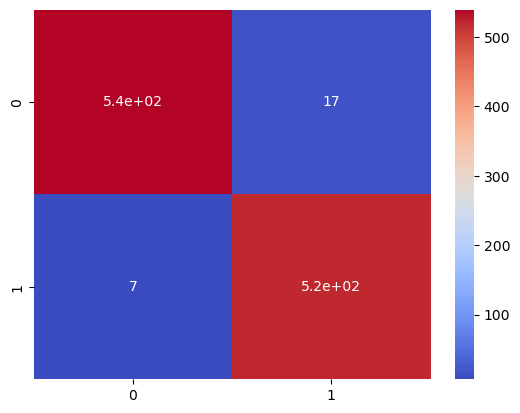

In [18]:
Accuracy=accuracy_score(y_pred,y_test)
print('Accuracy:',Accuracy)
CR=classification_report(y_pred,y_test)
print('Classification Report',CR)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="coolwarm")

1 Represent Male and 0 Represents female

# Deployment

In [40]:
import joblib
trained_model=joblib.dump(pipeline_1 ,'gender_classificaation_svc.joblib')

# Classification using Logistic Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and Logistic Regression classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Standardize features
    ('logistic_regression', LogisticRegression())   # Logistic Regression classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.98


# Model Evaluation

Accuracy Score is : 0.977859778597786
Classification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98       556
           1       0.97      0.99      0.98       528

    accuracy                           0.98      1084
   macro avg       0.98      0.98      0.98      1084
weighted avg       0.98      0.98      0.98      1084



<AxesSubplot:>

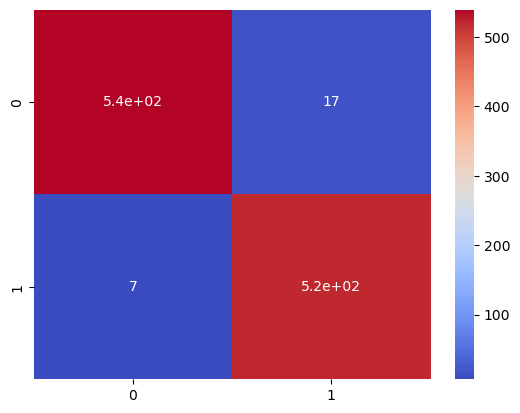

In [53]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy Score is :",accuracy)
C_report=classification_report(y_pred,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='coolwarm')

# Testing our model by giving a random Image

Text(0.5, 1.0, 'Male Faces')

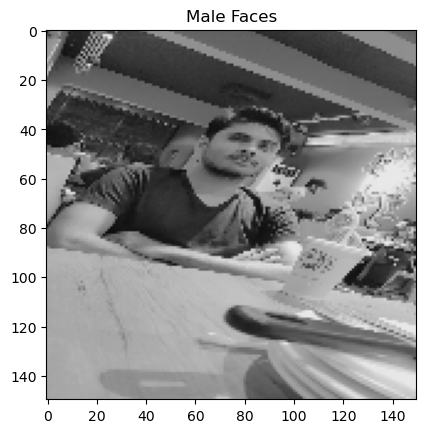

In [54]:
image_path='C:\\Users\\lenovo\\Pictures\\Camera Roll\\opencv\\1.jpg'
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=pipeline.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)


In [55]:
import joblib
trained_model=joblib.dump(pipeline,'gender_classificaation_logistic.joblib')

# Classification Using Random Forest 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and Random Forest classifier
pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),          # Standardize features
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest classifier
])

# Fit the pipeline on the training data
pipeline_2.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline_2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


Accuracy Score is : 0.9797047970479705
Classification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98       554
           1       0.97      0.99      0.98       530

    accuracy                           0.98      1084
   macro avg       0.98      0.98      0.98      1084
weighted avg       0.98      0.98      0.98      1084



<AxesSubplot:>

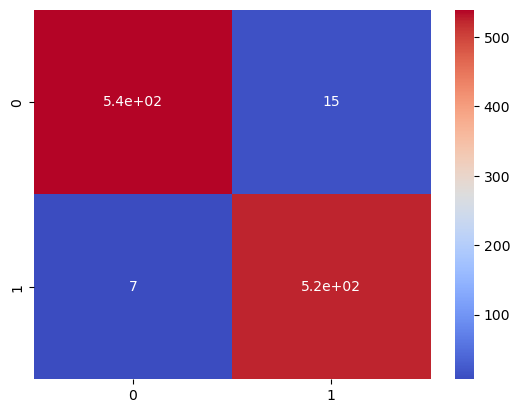

In [62]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy Score is :",accuracy)
C_report=classification_report(y_pred,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='coolwarm')

# Testing our model by giving a random image



Text(0.5, 1.0, 'Female Faces')

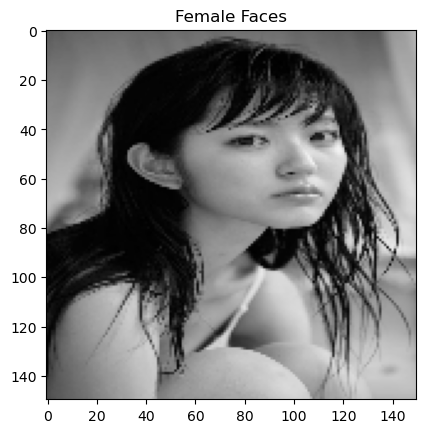

In [63]:
image_path='C:\\Users\\lenovo\\Downloads\\archive (3)\\Male and Female face dataset\\Female Faces\\0 (965).jpg'
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=pipeline_2.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)


#  KNN

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load your dataset and split it into features (X) and labels (y)
# X = ...
# y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and K-Nearest Neighbors classifier
pipeline_3 = Pipeline([
    ('scaler', StandardScaler()),          # Standardize features
    ('knn', KNeighborsClassifier(n_neighbors=5))  # K-Nearest Neighbors classifier with 5 neighbors
])

# Fit the pipeline on the training data
pipeline_3.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline_3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.85


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score is : 0.8533210332103321
Classification report:               precision    recall  f1-score   support

           0       0.86      0.85      0.86       557
           1       0.84      0.86      0.85       527

    accuracy                           0.85      1084
   macro avg       0.85      0.85      0.85      1084
weighted avg       0.85      0.85      0.85      1084



<AxesSubplot:>

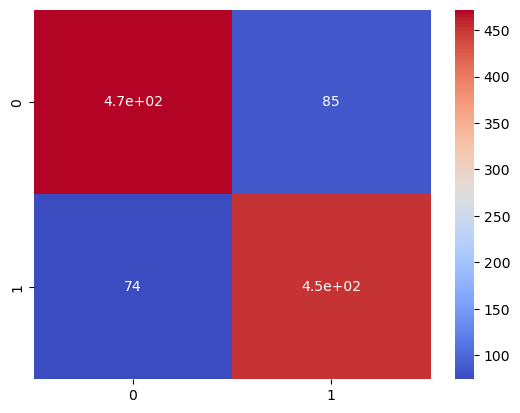

In [67]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy Score is :",accuracy)
C_report=classification_report(y_pred,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='coolwarm')

# Testing our model by giving a random  image

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 1.0, 'Female Faces')

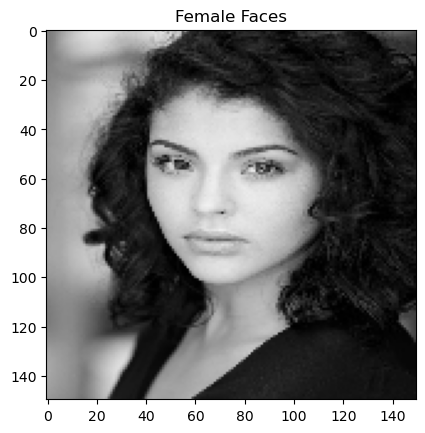

In [68]:
image_path='C:\\Users\\lenovo\\Downloads\\archive (3)\\Male and Female face dataset\\Female Faces\\0 (971).jpg'
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=pipeline_3.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)

In [69]:
import joblib
trained_model=joblib.dump(pipeline_3,'gender_classificaation_KNN.joblib')

# CNN

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPooling2D
import pandas as pd

In [72]:
x_data_array = X.to_numpy()



# Reshape your image data to match the expected input shape
x_data_reshaped = x_data_array.reshape(-1, 150, 150, 1)  # Grayscale images

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data_reshaped, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add Convolutional and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the data before passing it to the Dense layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))








In [73]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
136/136 [==============================] - 243s 2s/step - loss: 0.5678 - accuracy: 0.6936 - val_loss: 0.4615 - val_accuracy: 0.7934
Epoch 2/5
136/136 [==============================] - 280s 2s/step - loss: 0.3877 - accuracy: 0.8313 - val_loss: 0.3869 - val_accuracy: 0.8506
Epoch 3/5
136/136 [==============================] - 320s 2s/step - loss: 0.2313 - accuracy: 0.9119 - val_loss: 0.2262 - val_accuracy: 0.9142
Epoch 4/5
136/136 [==============================] - 275s 2s/step - loss: 0.1214 - accuracy: 0.9626 - val_loss: 0.1485 - val_accuracy: 0.9446
Epoch 5/5
136/136 [==============================] - 302s 2s/step - loss: 0.0607 - accuracy: 0.9802 - val_loss: 0.1039 - val_accuracy: 0.9742


In [74]:
model.save('cnn_model.h5')

C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 266ms/step


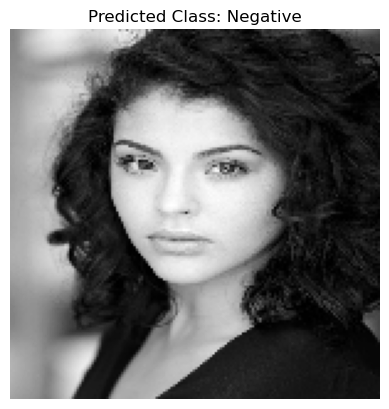

In [84]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = load_model('cnn_model.h5')

# Path to the single image
single_image_path = 'C:\\Users\\lenovo\\Downloads\\archive (3)\\Male and Female face dataset\\Female Faces\\0 (971).jpg'

# Load and preprocess the image
single_image = cv2.imread(single_image_path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(single_image, (150, 150))
normalized_image = resized_image / 255.0
preprocessed_image = normalized_image.reshape(1, 150, 150, 1)

# Make predictions using the loaded model
predictions = loaded_model.predict(preprocessed_image)

# Assuming you're using a binary classification model
predicted_class = "Positive" if predictions[0][0] > 0.5 else "Negative"

# Display the image and predicted class
plt.imshow(normalized_image, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Turn off axis labels
plt.show()


# Comparison of Different models performance

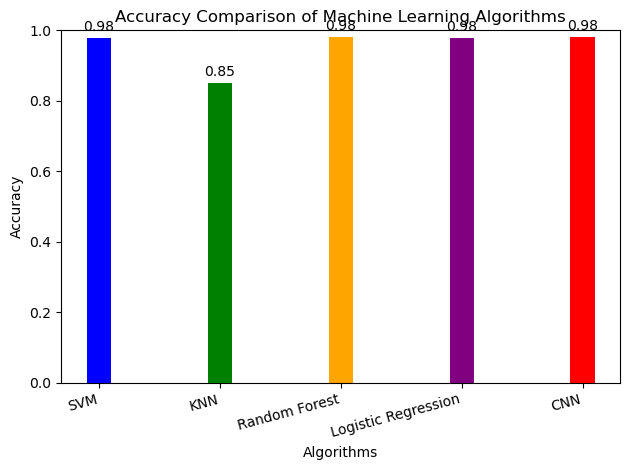

In [88]:
import matplotlib.pyplot as plt

algorithms = ['SVM', 'KNN',  'Random Forest', 'Logistic Regression', 'CNN']
accuracy = [0.9778, 0.85, 0.9797, 0.9778,0.98]

colors = ['blue', 'green', 'orange', 'purple', 'red','black']
bar_width = 0.2  # Width of the bars
bar_positions = range(len(algorithms))

plt.bar(bar_positions, accuracy, color=colors, width=bar_width)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Algorithms')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1

# Annotate each bar with its accuracy value
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')

# Adjust x-axis labels and positions
plt.xticks(bar_positions, algorithms, rotation=15, ha='right')

plt.tight_layout()  # To prevent labels from being cut off
plt.show()

****